In [9]:
using FCA, Plots, LinearAlgebra

## Separation of symmetirc matrix via FCA
(This simulation is associated with Figure 6 in FCA paper)

In [17]:
N, M = 800, 1600

(800, 1600)

In [18]:
G1, G2 = randn(N,N), randn(N,M)
X1 = (G1 + G1')/sqrt(2*N)
X2 = G2*G2'/M

800×800 Array{Float64,2}:
  1.01173      0.0177385   -0.0223675    …  -0.049438    -0.0205758 
  0.0177385    0.952106    -0.0153316       -0.00839156   0.0166784 
 -0.0223675   -0.0153316    1.03509          0.0103429    0.0239271 
 -0.00509342  -0.0411888    0.0280278        0.0399574    0.031039  
  0.0157989   -0.0161981    0.027579        -0.0306585   -0.0311674 
 -0.00860362  -0.0217971    0.00488862   …   0.0549527   -0.0230539 
  0.00610014  -0.0163582   -0.0460258       -0.00476469  -0.0544622 
  0.0111493    0.00465862  -0.0134727       -0.0308322   -0.0154908 
  0.00910995  -0.0114237   -0.00874113       0.0391828    0.0075531 
 -0.00350186  -0.0646347    0.0125026       -0.0505523    0.00683078
  0.00127459   0.0366696    0.0554347    …  -0.0178119   -0.0245941 
 -0.033851    -0.0183267    0.00850813      -0.0353968   -0.0289931 
 -0.018004    -0.00339603   0.029118        -0.034825    -0.0103038 
  ⋮                                      ⋱                          
 -0.0226

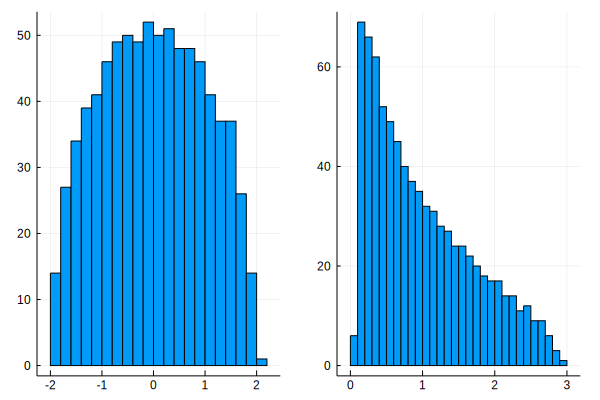

In [23]:
p1 = histogram(eigvals(X1); bins = 30, label = "")
p2 = histogram(eigvals(X2); bins = 30, label = "")
plot(p1,p2, layout = (1,2))

In [7]:
X = [X1,X2]
A = [0.5 0.5; -0.5 0.6]
Z = A*X

2-element Array{Array{Float64,2},1}:
 [0.496541 -0.0481115 … -0.0191869 -0.0145845; -0.0481115 0.453967 … -0.00910853 0.0488468; … ; -0.0191869 -0.00910853 … 0.501751 -0.0199328; -0.0145845 0.0488468 … -0.0199328 0.556166]
 [0.519006 0.0161576 … 0.0237168 0.0173803; 0.0161576 0.598989 … 0.0391954 -0.0466082; … ; 0.0237168 0.0391954 … 0.628708 -0.0120318; 0.0173803 -0.0466082 … -0.0120318 0.600552]        

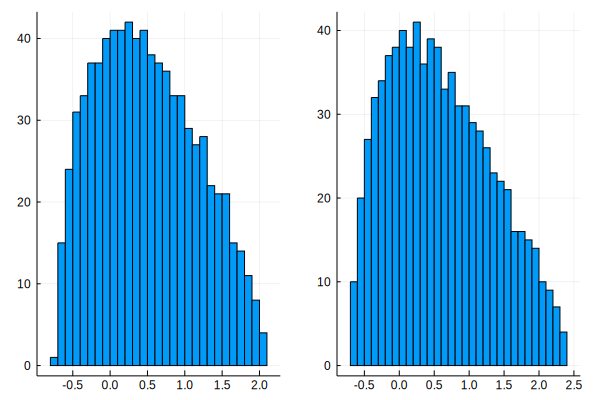

In [24]:
p3 = histogram(eigvals(Z[1]); bins = 30, label = "")
p4 = histogram(eigvals(Z[2]); bins = 30, label = "")
plot(p3,p4, layout = (1,2))

In [25]:
Aest, Xest = freecf(Z)
@show pinv(Aest)*A

([-0.447488 -0.500692; -0.53766 0.499061], Array{Float64,2}[[-1.03074 0.0323245 … -0.00466851 -0.0028904; 0.0323245 -1.06891 … -0.0306159 -0.00211402; … ; -0.00466851 -0.0306159 … -1.14754 0.0324286; -0.0028904 -0.00211402 … 0.0324286 -1.17405], [-0.0704946 0.0672004 … 0.0424932 0.0317121; 0.0672004 0.0486492 … 0.0455545 -0.0956693; … ; 0.0424932 0.0455545 … 0.0234887 0.0108278; 0.0317121 -0.0956693 … 0.0108278 -0.0614951]])

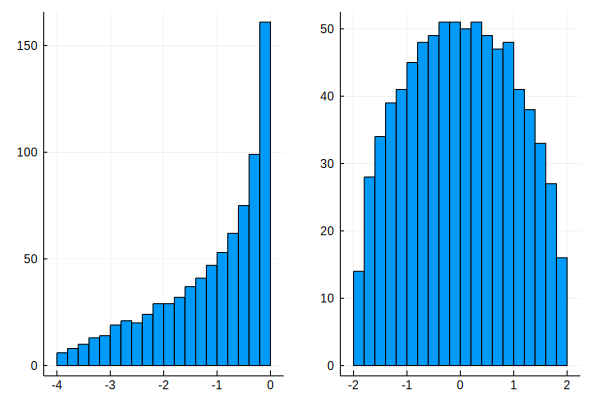

In [26]:
p5 = histogram(eigvals(Xest[1]); bins = 30, label = "")
p6 = histogram(eigvals(Xest[2]); bins = 30, label = "")
plot(p5,p6, layout = (1,2))

In [28]:
Aest, Xest = freecf(Z; obj = "ent")
@show pinv(Aest)*A

pinv(Aest) * A = [0.000924721 -1.11658; -1.0001 0.0001318]


2×2 Array{Float64,2}:
  0.000924721  -1.11658  
 -1.0001        0.0001318

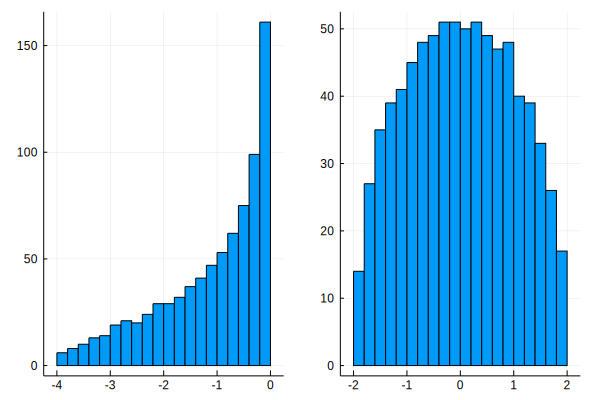

In [29]:
p7 = histogram(eigvals(Xest[1]); bins = 30, label = "")
p8 = histogram(eigvals(Xest[2]); bins = 30, label = "")
plot(p7,p8, layout = (1,2))

## Separation of rectangular matrix via FCA
(This simulation is associated with Figure 7 in FCA paper)

In [33]:
function dctmtx(n)
    cc, rr = [j for i = 0: n - 1, j = 0: n-1], [i for i = 0: n - 1, j = 0: n-1]
    c = sqrt(2 / n) * cos.(pi * (2*cc .+ 1) .* rr / (2 * n));
    c[1,:] = c[1,:] / sqrt(2);
    return c
end

dctmtx (generic function with 1 method)

In [34]:
function dstmtx(n)
    cc, rr = [j for i = 0: n - 1, j = 0: n-1], [i for i = 0: n - 1, j = 0: n-1]
    c = sqrt(2 / n) * sin.(pi * (2*cc .+ 1) .* (rr .+ 1) / (2 * n));
    c[n,:] = c[n,:] / sqrt(2);
    return c
end

dstmtx (generic function with 1 method)

In [41]:
N,M = 800, 1000
U,V = dstmtx(N), dctmtx(M);
D = Diagonal(map(x -> (x - 1)^4, range(1/2/N, length=N, stop=1-1/2/N)))
D = hcat(D, zeros(N, M - N))
X1 = U*D*V';
X2 = randn(N,M)/sqrt(M)


800×1000 Array{Float64,2}:
 -0.0330212    0.00051518  -0.00966053  …   0.0214177    0.0115155  
  0.0613635   -0.0365035   -0.0174312      -0.015108    -0.0261897  
  0.0220232   -0.0588628    0.00958992      0.00219575   0.00354301 
  0.0140783   -0.0184737   -0.0454033      -0.0622214   -0.0188865  
  0.016026    -0.0396774   -0.0176303       0.0258038   -0.0129401  
 -0.0379479    0.0250455    0.0336046   …  -0.00381362  -0.0326108  
 -0.00770603   0.0297779    0.0313777       0.0228932   -0.000311135
  0.0133677   -0.0185477   -0.00792861     -0.0217477    0.00696907 
 -0.0502598   -0.0171101    0.0233657      -0.00260786   0.0288578  
 -0.0251296   -0.0255189   -0.0135377       0.0135592    0.0303665  
 -0.0121205   -0.0176166   -0.0326362   …  -0.0536011    0.0142769  
  0.00581934  -0.0223361    0.00968404     -0.0324274   -0.0327729  
 -0.00493756  -0.00505272   0.00839302     -0.0394551   -0.0434152  
  ⋮                                     ⋱                           
  0.067

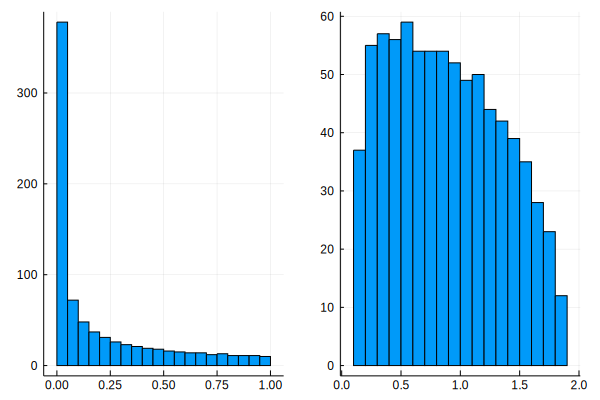

In [42]:
p1 = histogram(svdvals(X1); bins = 30, label = "")
p2 = histogram(svdvals(X2); bins = 30, label = "")
plot(p1,p2, layout = (1,2))

In [43]:
X = [X1,X2]
A = [0.5 0.5; -0.5 0.6]
Z = A*X

2-element Array{Array{Float64,2},1}:
 [0.0392368 0.05932 … 0.0107089 0.00575776; 0.100744 0.0690365 … -0.007554 -0.0130949; … ; -0.0301144 0.0100123 … 0.0776837 0.0320078; 0.0166534 -0.0060826 … 0.0390349 0.0449851]          
 [-0.0755601 -0.0587534 … 0.0128506 0.00690932; -0.0332441 -0.10919 … -0.00906478 -0.0157138; … ; -0.0370069 0.0107849 … -0.0644649 -0.050605; 0.0193692 -0.00816875 … -0.105691 -0.0503159]

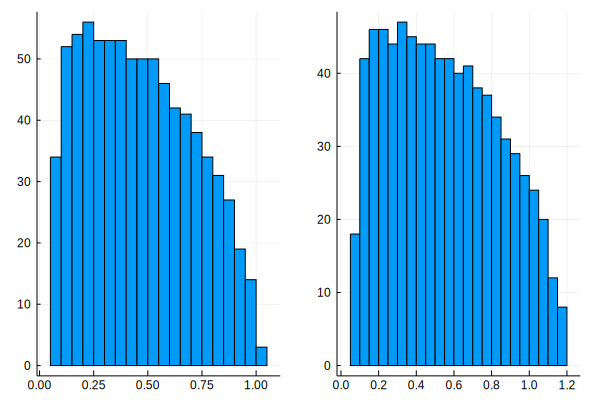

In [45]:
p3 = histogram(svdvals(Z[1]); bins = 30, label = "")
p4 = histogram(svdvals(Z[2]); bins = 30, label = "")
plot(p3,p4, layout = (1,2))

In [46]:
Aest, Xest = freecf(Z; mat = "rec")
@show pinv(Aest)*A

pinv(Aest) * A = [-3.00936 -0.00090665; 0.00173731 1.00114]


2×2 Array{Float64,2}:
 -3.00936     -0.00090665
  0.00173731   1.00114   

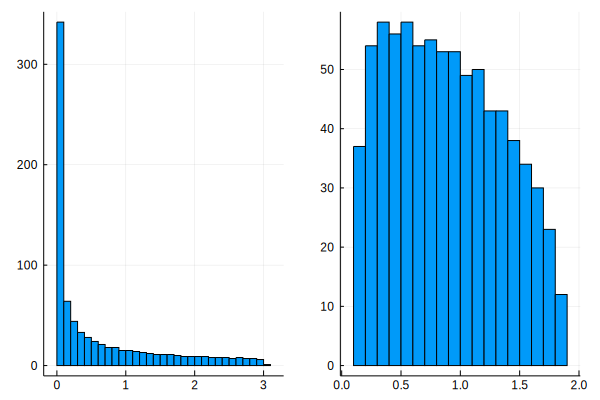

In [48]:
p5 = histogram(svdvals(Xest[1]); bins = 30, label = "")
p6 = histogram(svdvals(Xest[2]); bins = 30, label = "")
plot(p5,p6, layout = (1,2))

In [49]:
Aest, Xest = freecf(Z; mat = "rec", obj = "ent")
@show pinv(Aest)*A

pinv(Aest) * A = [-3.00936 1.94726e-8; -0.00446271 -1.00114]


2×2 Array{Float64,2}:
 -3.00936      1.94726e-8
 -0.00446271  -1.00114   

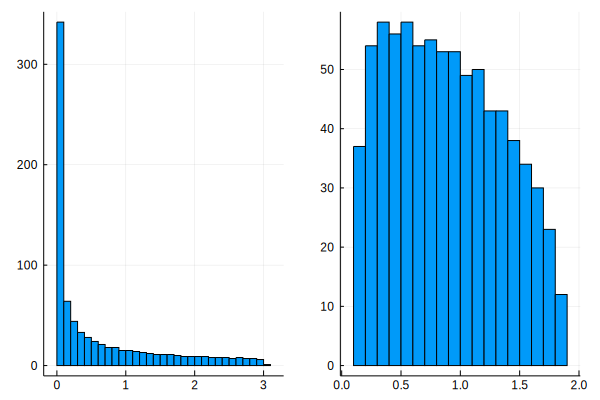

In [51]:
p7 = histogram(svdvals(Xest[1]); bins = 30, label = "")
p8 = histogram(svdvals(Xest[2]); bins = 30, label = "")
plot(p7,p8, layout = (1,2))